In [1]:
# import libraries
import requests
import time
import re
from bs4 import BeautifulSoup

In [2]:
# dataset for review features
data = []

# dataset for counting positive words
positive_words = ['good', 'extraordin', 'creat','nice','beauti','great','comfort','right','entertai',
                  'streng','strong','explore','excellen','magnific','star','convinc','easy to under',
                  'surpris','i love', 'i like','so much','respect','expected','powerful','special','enthusia','breathtak',
                  'best','immersi','masterpiece','stunnin','master','peak','effort','charm','enjoy',
                  'credib','pretty','epic','tactful','impress','fantas', 'solid','remarkable','intrigui']

# dataset for counting negative words
negative_words = ['bad', 'hell', '?', 'only', 'toxic','disgust','not comfort','not right','weak',
                  'dumb','embarra','tragedy', 'little','gospel','nasty','fail','difficult to under',
                  'confus','awful','disappoint','judg','criti','no idea','sleepy','strange','predictable',
                  'hype','fall','t know','sad','worst','worse','trash','but','however','drag','disaster', 'ridiculous',
                  'unlikely','boring','stupid','overlong','obnoxious','soulless','not tactful','silly','mess',
                  'why', 'lack of','silliness','no sense','miscast','wonder','wrong','lost soul',
                  'can do better','could do better','no soul','hellish','bore','nonsens','weird',
                  'torturous','tortur','dying','meaningless','cries','cry','crying', 'unsatisf','uncertain',
                  'too long','hardly','slow','nothing','ineffect','wary','uneven','suck','suffer']

# set the target movie name
movies = ['generation_war_2014','constantine','doctor_sleep','joker_2019','the_dark_knight','2012','avatar',
          'seven_samurai_1956','weathering_with_you','your_name_2017']

# set how many pages of review, set to 25 since those 10 movies have no more than 25 pages of review
numPages = 25

my_headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'}

##############################################################################################################################

for k in range(1,numPages+1):
    for movie in movies:
        # get url
        page = 'https://rottentomatoes.com/m/'+str(movie)+'/reviews?page='+str(k) 
        src = False

        # scrape five times
        for i in range(1,6): 
            try:
                # get url content
                response = requests.get(page, headers = my_headers)
                # get the html content
                src = response.content
                break 
            # if requests.get() threw an exception, i.e., the attempt to get the response failed
            except:
                print ('failed attempt #',i)
                # wait 2 secs before trying again
                time.sleep(2)

        # if we could not get the page 
        if not src:
           # couldnt get the page, print that we could not and continue to the next attempt
           print('Could not get page: ', page)
           # move on to the next page
           continue 
        else:
           # got the page, let the user know
           print('Successfully got page: ', page)

#############################################################################################################################
    
        soup = BeautifulSoup(src.decode('ascii', 'ignore'), 'lxml')
        reviews = soup.findAll('div', {'class':re.compile('review_table_row')})
    
    
        for review in reviews:
            # initialize to not found
            rating  = 'NA'
            source = 'NA'
            positive = 0
            negative = 0

            # set rating value, 1 is fresh and 0 is rotten
            icon = review.find('div', {'class':re.compile('review_icon')})
            if icon:
                rate = icon.attrs['class']
                rating = rate[3]
            if rating == 'fresh':
                rating = 1
            else:
                rating = 0

            # set source value
            s = review.find('em')
            if s:
                source = s.text
        
            # get review texts
            t = review.find('div', {'class':re.compile('the_review')})
            if t:
                text = t.text.strip()
        
            # set positive review
            for p in positive_words:
                if p in text.lower():
                    positive = positive + 1
        
            # set negative review
            for n in negative_words:
                if n in text.lower():
                    negative = negative + 1

#############################################################################################################################

            # add them into data list       
            data.append([rating, text, len(text), source, positive, negative])

Successfully got page:  https://rottentomatoes.com/m/generation_war_2014/reviews?page=1
Successfully got page:  https://rottentomatoes.com/m/constantine/reviews?page=1
Successfully got page:  https://rottentomatoes.com/m/doctor_sleep/reviews?page=1
Successfully got page:  https://rottentomatoes.com/m/joker_2019/reviews?page=1
Successfully got page:  https://rottentomatoes.com/m/the_dark_knight/reviews?page=1
Successfully got page:  https://rottentomatoes.com/m/2012/reviews?page=1
Successfully got page:  https://rottentomatoes.com/m/avatar/reviews?page=1
Successfully got page:  https://rottentomatoes.com/m/seven_samurai_1956/reviews?page=1
Successfully got page:  https://rottentomatoes.com/m/weathering_with_you/reviews?page=1
Successfully got page:  https://rottentomatoes.com/m/your_name_2017/reviews?page=1
Successfully got page:  https://rottentomatoes.com/m/generation_war_2014/reviews?page=2
Successfully got page:  https://rottentomatoes.com/m/constantine/reviews?page=2
Successfully g

Successfully got page:  https://rottentomatoes.com/m/constantine/reviews?page=11
Successfully got page:  https://rottentomatoes.com/m/doctor_sleep/reviews?page=11
Successfully got page:  https://rottentomatoes.com/m/joker_2019/reviews?page=11
Successfully got page:  https://rottentomatoes.com/m/the_dark_knight/reviews?page=11
Successfully got page:  https://rottentomatoes.com/m/2012/reviews?page=11
Successfully got page:  https://rottentomatoes.com/m/avatar/reviews?page=11
Successfully got page:  https://rottentomatoes.com/m/seven_samurai_1956/reviews?page=11
Successfully got page:  https://rottentomatoes.com/m/weathering_with_you/reviews?page=11
Successfully got page:  https://rottentomatoes.com/m/your_name_2017/reviews?page=11
Successfully got page:  https://rottentomatoes.com/m/generation_war_2014/reviews?page=12
Successfully got page:  https://rottentomatoes.com/m/constantine/reviews?page=12
Successfully got page:  https://rottentomatoes.com/m/doctor_sleep/reviews?page=12
Successfu

Successfully got page:  https://rottentomatoes.com/m/constantine/reviews?page=21
Successfully got page:  https://rottentomatoes.com/m/doctor_sleep/reviews?page=21
Successfully got page:  https://rottentomatoes.com/m/joker_2019/reviews?page=21
Successfully got page:  https://rottentomatoes.com/m/the_dark_knight/reviews?page=21
Successfully got page:  https://rottentomatoes.com/m/2012/reviews?page=21
Successfully got page:  https://rottentomatoes.com/m/avatar/reviews?page=21
Successfully got page:  https://rottentomatoes.com/m/seven_samurai_1956/reviews?page=21
Successfully got page:  https://rottentomatoes.com/m/weathering_with_you/reviews?page=21
Successfully got page:  https://rottentomatoes.com/m/your_name_2017/reviews?page=21
Successfully got page:  https://rottentomatoes.com/m/generation_war_2014/reviews?page=22
Successfully got page:  https://rottentomatoes.com/m/constantine/reviews?page=22
Successfully got page:  https://rottentomatoes.com/m/doctor_sleep/reviews?page=22
Successfu

In [3]:
# print data
for review in data:
        print(review)

[1, "While Generation War is propulsive and determined to stay juicy (there's plenty of shooting and schtupping) it offers some surprising restraint when it comes to telling you how exactly to feel.", 193, 'Times of Israel', 1, 0]
[1, 'Suffice it to say that this is an extraordinarily moving story told from the universal perspective of "war is hell" even when it is the enemy telling the story.', 160, 'Easy Reader (California)', 1, 1]
[0, 'Apart from the bizarre coincidences (how often can five friends cross paths on a battlefield stretching all the way from Poland to the northeast of the Ukraine?), Generation War has other typical marks of TV melodrama.', 218, 'The New York Review of Books', 0, 1]
[0, 'A 4 1/2-hour German take on WWII', 32, 'Movie Habit', 0, 0]
[1, "It's an involving story and an intriguing view of history.", 58, 'St. Paul Pioneer Press', 1, 0]
[1, "It's as retrograde - if also as perversely intoxicating - as an old Hollywood melodrama.", 88, 'Washington Post', 0, 1]
[

[1, 'We can be content to enjoy a work that manages to modernize a character carved in the collective imagination in a completely original way. [Full review in Spanish]', 163, 'Cocalecas', 1, 0]
[0, "The movie isn't badly made or even ugly to look at, but there's a mean, smug little heart at the center of it that, at best, irresponsibly frames a familiar male power fantasy as a revolutionary act.", 199, 'Thrillist', 2, 3]
[1, 'The most uncompromising American film since FIRST REFORMED.', 59, "JoBlo's Movie Emporium", 0, 0]
[1, 'There are many brilliant moments in the film, most of which are provided by Phoenix himself. But the dramatic intensity can be a lot to stand. You could almost hear Heath Ledger\'s Joker ask "Why so serious?" [Full Review in Spanish]', 232, 'Otroscines.com', 0, 3]
[1, "Joker is a dark and complex exploration of mental illness, led by Phoenix's phenomenal performance, which elevates the film to the next level.", 142, 'We Live Entertainment', 0, 0]
[1, 'JOKER look

In [4]:
import pandas as pd 
import os
import numpy as np
import math
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')

The columns (features) are:

```
Col.  Name      Description
----- --------- ----------------------------------------------------------------
1     rating    1 means that the review is positive, 0 means that the review is negative
2     text      Review text
3     length    How long the review is
4     source    Source of review (included but not used in model)
5     positive  How many positive words there are in this review
6     negative  How many negative words there are in this review

```


In [5]:
# create a dataframe format for reviews infor
df = pd.DataFrame(data, columns = ['rating', 'text', 'length', 'source', 'positive', 'negative'])
df.head()

,rating,text,length,source,positive,negative
0,1,While Generation War is propulsive and determi...,193,Times of Israel,1,0
1,1,Suffice it to say that this is an extraordinar...,160,Easy Reader (California),1,1
2,0,Apart from the bizarre coincidences (how often...,218,The New York Review of Books,0,1
3,0,A 4 1/2-hour German take on WWII,32,Movie Habit,0,0
4,1,It's an involving story and an intriguing view...,58,St. Paul Pioneer Press,1,0


In [6]:
# Import decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# set the predictor features
predictor_cols = ['length', 'positive', 'negative']

# Define the model
decision_tree = DecisionTreeClassifier(max_depth=3, criterion="entropy")
decision_tree.fit(df[predictor_cols], df['rating'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
# get some predictions
preds = decision_tree.predict(df[predictor_cols])

predictions_df = df.assign(predictions=preds)

predictions_df.head(10)

,rating,text,length,source,positive,negative,predictions
0,1,While Generation War is propulsive and determi...,193,Times of Israel,1,0,1
1,1,Suffice it to say that this is an extraordinar...,160,Easy Reader (California),1,1,1
2,0,Apart from the bizarre coincidences (how often...,218,The New York Review of Books,0,1,1
3,0,A 4 1/2-hour German take on WWII,32,Movie Habit,0,0,1
4,1,It's an involving story and an intriguing view...,58,St. Paul Pioneer Press,1,0,1
5,1,It's as retrograde - if also as perversely int...,88,Washington Post,0,1,1
6,1,Think of the ambitious 'Generation War' as a G...,240,The Patriot Ledger,0,0,1
7,1,Less to do with making the Germans look good t...,212,"Mountain Xpress (Asheville, NC)",1,1,1
8,0,Though director Philipp Kadelbach and screenwr...,200,Boston Globe,1,1,1
9,1,"""Generation War"" has a texture and an interest...",76,Los Angeles Times,0,0,1


In [8]:
# output the model accuracy
from sklearn import metrics
print ( "Accuracy = %.3f" % (metrics.accuracy_score(predictions_df["predictions"], predictions_df["rating"])) )

Accuracy = 0.727


In [9]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


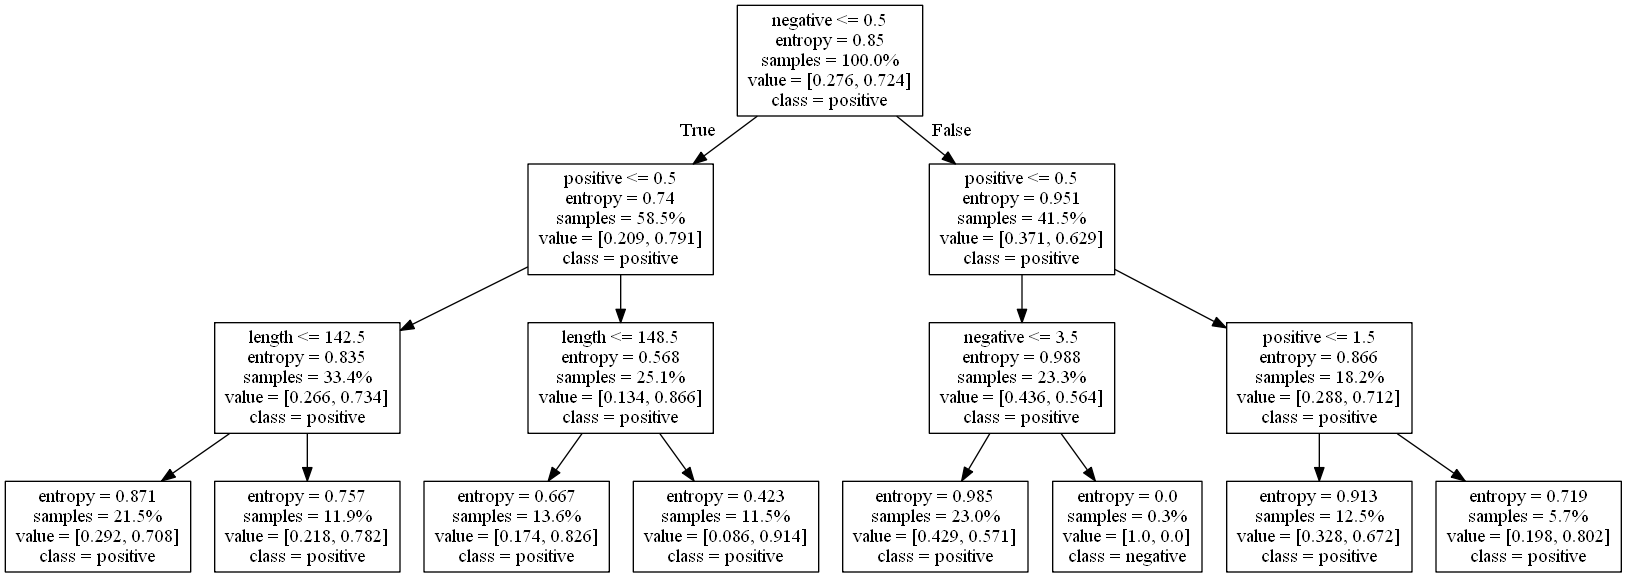

In [10]:
from IPython.display import Image

from sklearn.tree import export_graphviz

def visualize_tree(decision_tree, feature_names, class_names, directory=r"C:\Users\11654\Desktop", name="tree",proportion=True):
    
    # Export our decision tree to graphviz format
    dot_name = "%s\%s.dot" % (directory, name)
    dot_file = export_graphviz(decision_tree, out_file=dot_name,
                               feature_names=feature_names, class_names=class_names,proportion=proportion)
        
    # Call graphviz to make decision tree image
    image_name = "%s\%s.png" % (directory, name)
    os.system("dot -Tpng %s -o %s" % (dot_name, image_name))
    
    # Return png image
    return Image(filename=image_name)

visualize_tree(decision_tree, predictor_cols, ["negative", "positive"])

In [11]:
# Split data into X and Y
Y = df['rating']
X = df.drop(['rating'],1).drop(['text'],1).drop(['source'],1)

In [12]:
X.head()

,length,positive,negative
0,193,1,0
1,160,1,1
2,218,0,1
3,32,0,0
4,58,1,0


In [13]:
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: rating, dtype: int64

In [14]:
# Import train, test, and evaluation functions
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

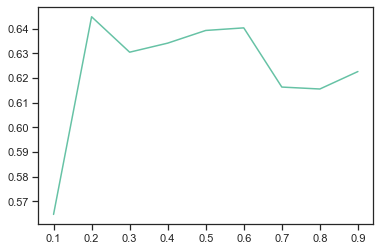

In [17]:
# Training percentages set up 
training_percentages = [0.10,0.20,0.30,0.40,0.50, 0.60, 0.70, 0.80, 0.90]

# list to store accuracies 
accuracies = []

for training_percentage in training_percentages:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=training_percentage)

    # create an empty logistic regression and fit X/Y
    tree = DecisionTreeClassifier(criterion="entropy")
    tree.fit(X_train, Y_train)
    Y_test_predicted = tree.predict(X_test)

    # With these predictions we can get an accuracy
    acc = accuracy_score(Y_test_predicted, Y_test)
    accuracies.append(acc)

# Plot the learning curve
plt.plot(training_percentages, accuracies)
plt.show()

In [18]:
Y.mean()

0.7237960339943342